In [89]:
import netCDF4 as nc4
import xarray as xr
import numpy as np
import pandas as pd
import warnings
import sys
warnings.filterwarnings('ignore')
sys.path.append('/glade/u/home/adamhb/Earth-System-Model-Tools/')
import esm_tools
from matplotlib import pyplot as plt

## Paths to data

In [90]:
#late20th = 'supIg105_020224-1951-2020_-17e2acb6a_FATES-5b076b69'
# untreated_case = 'CZ2_equilibrium_700yrs_042524_01_-17e2acb6a_FATES-1449c787'
# treated_case = 'sup_043024-1870-1951_-17e2acb6a_FATES-1449c787'

# untreated_case = 'supIg105_020224-2015-2098_-17e2acb6a_FATES-5b076b69'
# treated_case = 'supIg105_treated_041124-2015-2098-2015-2098_-17e2acb6a_FATES-1449c787'

untreated_case = 'ml_supported_ensemble_050224_04_-17e2acb6a_FATES-1449c787'
treated_case = 'logging_test_050824-1870-1951_-17e2acb6a_FATES-1449c787'

## Fields

In [91]:
fields = [
          #have on to import these dimensions
          #'FATES_SEED_PROD_USTORY_SZ',
          'FATES_VEGC_AP',
          #patches and cohorts
          'FATES_NPATCHES',
          #'FATES_PATCHAREA_AP','FATES_CANOPYAREA_AP',
          'FATES_NCOHORTS','FATES_NPATCH_AP',
          #structure
          #'FATES_LAI_AP',
          #density
          'FATES_NPLANT_PF',
          'FATES_NPLANT_SZAPPF',
          'FATES_NPLANT_SZPF',
          'FATES_NPLANT_ACPF',
          #'FATES_NPLANT_CANOPY_SZPF',
          #'FATES_NPLANT_USTORY_SZPF',
          #basal area
          'FATES_BASALAREA_SZPF',
          #crown_area
          #'FATES_CANOPYCROWNAREA_PF',
          #'FATES_CANOPYCROWNAREA_APPF',
          #'FATES_CANOPYAREA_HT',
          #'FATES_CROWNAREA_CLLL',
          #'FATES_CROWNAREA_PF',
          #biomass
          'FATES_VEGC_PF','FATES_VEGC_AP','FATES_VEGC_ABOVEGROUND','FATES_VEGC_ABOVEGROUND_SZPF',
          #growth
          'FATES_DDBH_SZPF',
          'FATES_DDBH_CANOPY_SZAP','FATES_DDBH_USTORY_SZAP',
          #mortality
          'FATES_MORTALITY_PF',
          'FATES_MORTALITY_CANOPY_SZ',
          #'FATES_MORTALITY_USTORY_SZAP',
          'FATES_MORTALITY_BACKGROUND_SZPF','FATES_MORTALITY_HYDRAULIC_SZPF','FATES_MORTALITY_CSTARV_SZPF',
          'FATES_MORTALITY_IMPACT_SZPF',
          'FATES_MORTALITY_FIRE_SZPF','FATES_MORTALITY_CROWNSCORCH_SZPF',
          'FATES_MORTALITY_CANOPY_SZ','FATES_MORTALITY_USTORY_SZ',
          'FATES_MORTALITY_SENESCENCE_SZPF',
          #seed production and recruitment
          #'FATES_SEED_PROD_USTORY_SZ','FATES_SEED_PROD_CANOPY_SZ',
          #'FATES_SEEDS_IN',
          #'FATES_SEED_BANK',
          #'FATES_SEEDBANK_PF',
          #'FATES_SEED_ALLOC_SZPF',
          'FATES_RECRUITMENT_PF',
          #GPP and NPP
          'FATES_GPP','FATES_GPP_SZPF',
          'FATES_NPP_PF','FATES_NPP_SZPF',
          'FATES_AUTORESP_SZPF','FATES_MAINTAR_SZPF',
          #physical environment
          #Light
          # 'FATES_LAISUN_Z_CLLL','FATES_LAISHA_Z_CLLL',
          # 'FATES_LAISUN_Z_CLLLPF','FATES_LAISHA_Z_CLLLPF',
          # 'FATES_PARSUN_Z_CLLLPF','FATES_PARSHA_Z_CLLLPF',
          # 'FATES_PARPROF_DIR_CLLL','FATES_PARPROF_DIF_CLLL',
          # 'FATES_PARPROF_DIF_CLLLPF','FATES_PARPROF_DIR_CLLLPF',
          #Litter
          #'FATES_CWD_ABOVEGROUND_DC',
          #'FATES_FUEL_AMOUNT',
          #CLM
          #'QVEGT','QVEGE','QSOIL','TLAI','TBOT','RAIN','QBOT','Q2M',
          #'BTRAN',
          #H20
          'SMP',#,
          #allocation
          #'FATES_STOREC_CANOPY_SZPF','FATES_STOREC_USTORY_SZPF',
          #fire
          'FATES_BURNFRAC','FATES_IGNITIONS','FATES_FIRE_INTENSITY_BURNFRAC',
          #'FATES_FUEL_BULKD','FATES_FUEL_SAV',
           'FATES_DISTURBANCE_RATE_FIRE',
           'FATES_FUEL_AMOUNT_AP',
           'FATES_FIRE_INTENSITY_BURNFRAC_AP',
           'FATES_BURNFRAC_AP',
           'FATES_FUEL_AMOUNT_APFC',
           'FATES_FUEL_AMOUNT',
           'FATES_FDI',
           'FATES_FIRE_INTENSITY',
           'FATES_FUELCONSUMED',
           'FATES_NESTEROV_INDEX',
           'FATES_MORTALITY_CROWNSCORCH_SZPF',
           'FATES_SCORCH_HEIGHT_APPF','FATES_FUEL_MEF',
           'FATES_FUEL_EFF_MOIST','FATES_FUEL_MOISTURE_FC','FATES_ROS'
          ]

## Load data

In [92]:
untreated = esm_tools.load_fates_output_data(model_output_root='/glade/derecho/scratch/adamhb',
                                 case_name=untreated_case,years = list(range(1319,1320)),fields=fields,inst_tag='0107')

treated = esm_tools.load_fates_output_data(model_output_root='/glade/derecho/scratch/adamhb',
                                 case_name=treated_case,years = list(range(1320,1321)),fields=fields,inst_tag='0107')

# untreated = esm_tools.load_fates_output_data(model_output_root='/glade/derecho/scratch/adamhb',
#                                  case_name=untreated_case,years = list(range(1319,1320)),fields=fields,inst_tag='0014')

# treated = esm_tools.load_fates_output_data(model_output_root='/glade/derecho/scratch/adamhb',
#                                  case_name=treated_case,years = list(range(2015,2016)),fields=fields,inst_tag='0014')

# untreated = esm_tools.load_fates_output_data(model_output_root='/glade/derecho/scratch/adamhb',
#                                  case_name=untreated_case,years = list(range(2015,2016)),fields=fields,inst_tag='0014')

# treated = esm_tools.load_fates_output_data(model_output_root='/glade/derecho/scratch/adamhb',
#                                  case_name=treated_case,years = list(range(2015,2016)),fields=fields,inst_tag='0014')

-- your data have been read in -- 
-- your data have been read in -- 


In [93]:
# y1 = esm_tools.get_combustible_fuel(treated,timeseries=True)
# y1

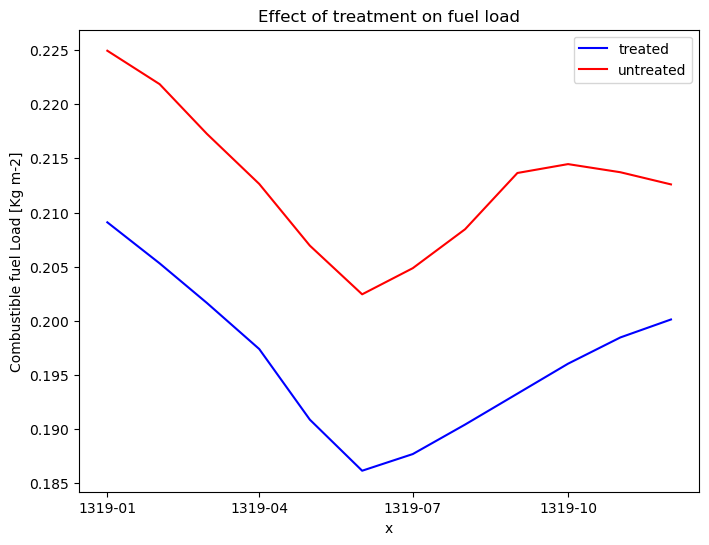

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = untreated.time

# Generate y values for two functions
y1 = esm_tools.get_combustible_fuel(treated,timeseries=True)
y2 = esm_tools.get_combustible_fuel(untreated,timeseries=True)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='treated', color='blue')  # Plot the first line
plt.plot(x, y2, label='untreated', color='red')   # Plot the second line

# Add a title and labels
plt.title('Effect of treatment on fuel load')
plt.xlabel('x')
plt.ylabel('Combustible fuel Load [Kg m-2]')

# Add a legend
plt.legend()

# Show the plot
plt.show()

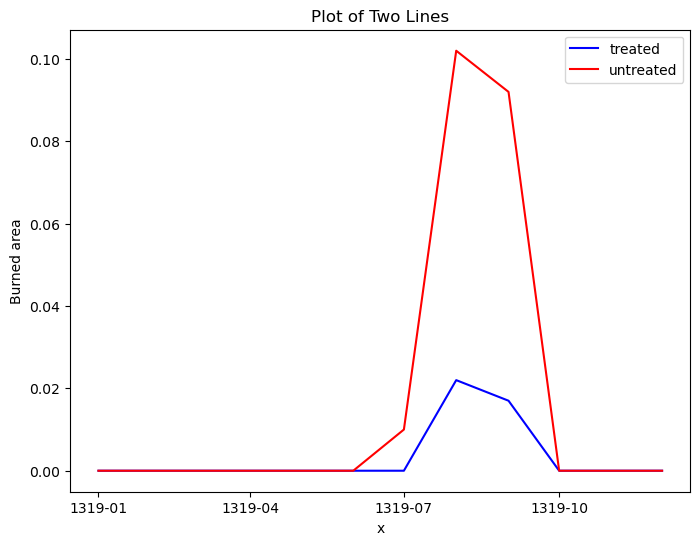

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = untreated.time

# Generate y values for two functions
y1 = esm_tools.get_mean_annual_burn_frac(treated,over_time=True)
y2 = esm_tools.get_mean_annual_burn_frac(untreated,over_time = True)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='treated', color='blue')  # Plot the first line
plt.plot(x, y2, label='untreated', color='red')   # Plot the second line

# Add a title and labels
plt.title('Plot of Two Lines')
plt.xlabel('x')
plt.ylabel('Burned area')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [96]:
# # Generate y values for two functions
# y1 = esm_tools.get_PHS_FLI_thresh(treated,3500)
# y2 = esm_tools.get_PHS_FLI_thresh(untreated,3500)

# print(y1)
# print(y2)

## Total basal area

In [97]:
conifer_ba_treated = esm_tools.get_tree_basal_area_over_time(treated)
conifer_ba_treated

array([27.069332, 27.095613, 27.130514, 27.173092, 27.382576, 27.663162,
       27.806438, 27.818476, 27.784904, 27.767666, 27.747501, 27.734787],
      dtype=float32)

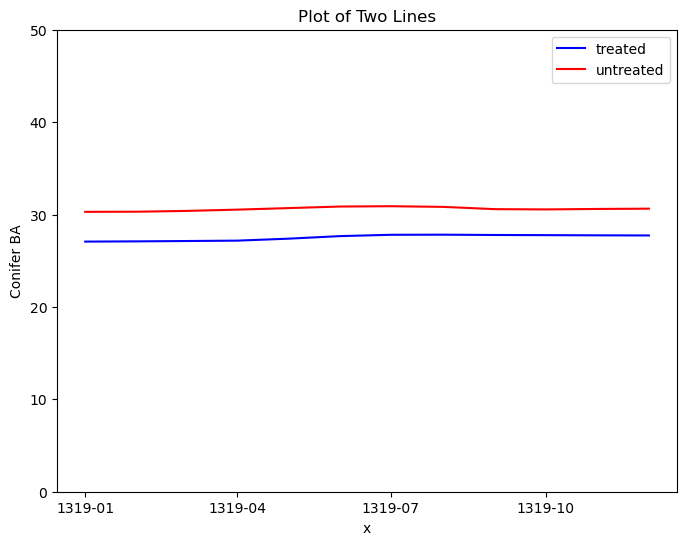

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = untreated.time

# Generate y values for two functions
conifer_ba_untreated = esm_tools.get_tree_basal_area_over_time(untreated)
conifer_ba_treated = esm_tools.get_tree_basal_area_over_time(treated)

y1 = conifer_ba_treated
y2 = conifer_ba_untreated
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='treated', color='blue')  # Plot the first line
plt.plot(x, y2, label='untreated', color='red')   # Plot the second line

# Add a title and labels
plt.title('Plot of Two Lines')
plt.xlabel('x')
plt.ylim((0,50))
plt.ylabel('Conifer BA')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [99]:
print(conifer_ba_untreated)
print(conifer_ba_treated)

[30.290562 30.305336 30.387522 30.529078 30.693129 30.864855 30.898628
 30.827988 30.58062  30.551989 30.603827 30.63298 ]
[27.069332 27.095613 27.130514 27.173092 27.382576 27.663162 27.806438
 27.818476 27.784904 27.767666 27.747501 27.734787]


### GPP in 20th century

In [100]:
# tags = esm_tools.inst_to_tag(np.load('/glade/work/adamhb/processed_output/supIg105_020224/old/inst_supIg105_020224.npy'))
# GPP_full = []
# for i in tags:
#     GPP_xr = esm_tools.load_fates_output_data(model_output_root='/glade/derecho/scratch/adamhb',
#                                      case_name=late20th,years = list(range(1960,2010)),fields=['FATES_GPP'],inst_tag=i)
    
#     tmp = GPP_xr['FATES_GPP'].mean(dim="time").values * 3.154e+7
#     GPP_full.append(tmp)

# print(np.array(GPP_full).mean())
# print(np.array(GPP_full).std())